<a href="https://colab.research.google.com/github/PutriAW/DTI-ASSIGNMENT-CLUSTERING/blob/main/Mall_Customer_Segmentation_Using_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **MALL CUSTOMER SEGMENTATION USING KMEANS**
Created By Putri Apriyanti Windya 
 (DS0124 - Data Scientist 01)

# **Dataset**

---
 Dataset for this clustering obtained from https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

# **Description**

---

There are 5 columns in this dataset. Each row in this dataset represent one customer identified by customer id. Each columns described below:


1.   CustomerID
2.   Gender
3.  Age
4.  Annual Income ($)
5.  Spending Score

From 5 columns above we will use some columns to be cluster based on data preprocesing process.



# **Problem to Solve**

---

We want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

# **Import All Libraries that Needed**

In [17]:
# Common Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# PreProcessing Library
from sklearn import preprocessing as pre
from sklearn.preprocessing import StandardScaler 

# Clustering Library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score


plt.style.use('ggplot')

# **Data Preparation**

## **Data Exploration**

In [2]:
# Import Dataset
df_mcs = pd.read_csv('https://raw.githubusercontent.com/PutriAW/DTI-ASSIGNMENT-CLUSTERING/main/Mall_Customers.csv', sep=',')
df_mcs

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
# Prints the Dataset Information
df_mcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# describe dataset descriptive statistics to know next step
df_mcs.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [5]:
# check total of null values for each columns 
print(df_mcs.isnull().sum())

# Sum all record that contain null values 
print("Total Null Record :  ",df_mcs.isnull().sum().sum())

# check null values percentage
print('Presentase null value: ')
print(round(df_mcs.isnull().sum()/len(df_mcs)*100, 2),"%")

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Total Null Record :   0
Presentase null value: 
CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64 %


In [6]:
# From data info above we know that Gender Dtype is Object so we will describe its values 
print(df_mcs.Gender.unique())

['Male' 'Female']


In [7]:
# check gender domination toward data
df_mcs.describe(include='O')

,Gender
count,200
unique,2
top,Female
freq,112


**Info**

As we can see from gender domination, female has a lot frequention than male about 56%.


Text(0.5, 1.0, 'Gender Presentation')

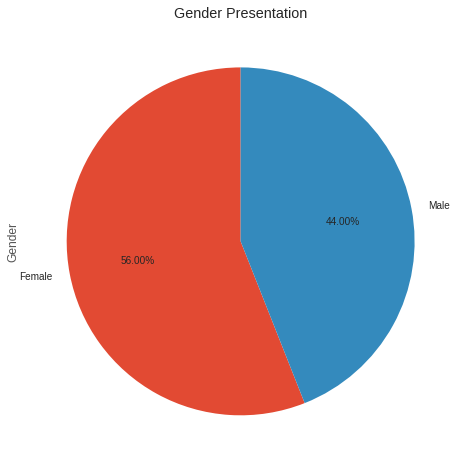

In [8]:
# Gender Visualization
df_mcs['Gender'].value_counts().plot(kind='pie', figsize=(8,8), autopct='%1.2f%%', startangle=90)
plt.title('Gender Presentation')

**Check Data Distribution**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

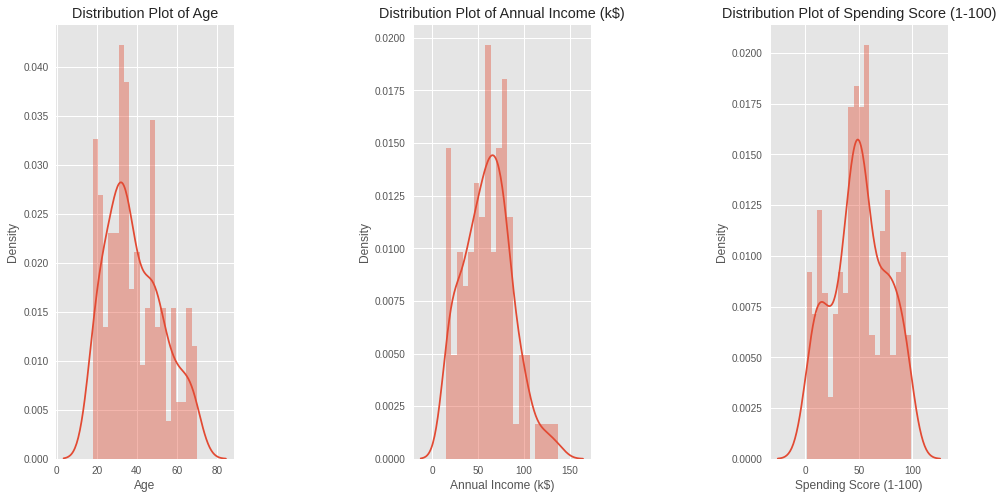

In [9]:
# plot numeric data distribution
plt.figure(1, figsize=(16, 8))
i = 1

for j in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)' ] :
  plt.subplot(1, 3 , i)
  sns.distplot(df_mcs[j], bins=20)
  plt.subplots_adjust(wspace=1.0, hspace=1.0)
  plt.title('Distribution Plot of {}'.format(j))
  i += 1

plt.show()


**Info**


*   Each columns of this dataset beside CustomerID and Gender has Normal distribution based on curve shape.





## **Data Cleansing**


---

In this step we will remove unused column or handling null values, but in ur dataset there is no null values and we don't want to remove any columns so just skip this step.

## **Feature Engineering**


---

In this step we do check categorical column in our dataset and then choose which column that we will use for our classification. But, at this moment we will not transform categorical column because we will use 2 main columns that we will choose by using correlation map.


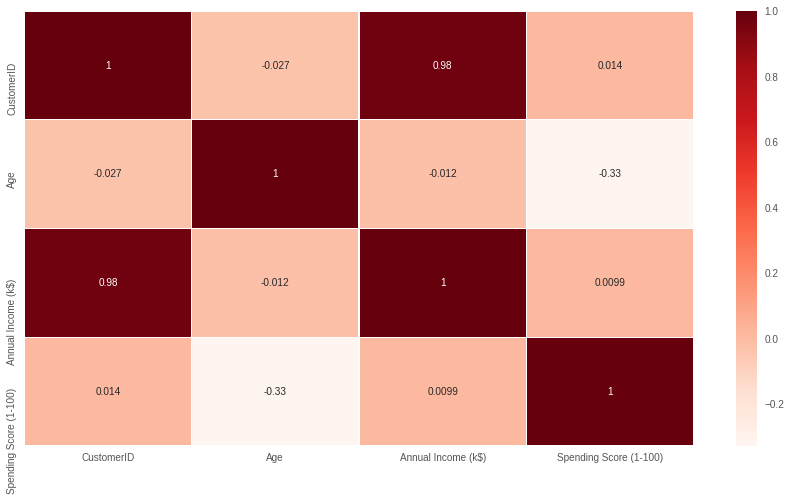

In [10]:
'''check all correlation between variables to take next step. when the color closed to 1 its means that the correlation is positive 
and if the color closed to -0.2 its means that the correlation is negative

NB : Do not notice customerID for now
''' 
plt.figure(figsize=(15,8))
sns.heatmap(df_mcs.corr(), annot=True, linewidths=0.1, cmap='Reds')

**Info**
From Correlation map above we can see that Annual income and Spending Score has Strong correlation so that we will use them.

In [11]:
df_mcsT = df_mcs[['Annual Income (k$)', 'Spending Score (1-100)']]
df_mcsT.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [12]:
# Scale selected columns
scaler = StandardScaler()
c_names = ['Annual Income (k$)', 'Spending Score (1-100)']
df_mcsT[c_names] = scaler.fit_transform(df_mcsT[c_names])
df_mcsT.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


**Visualize data**

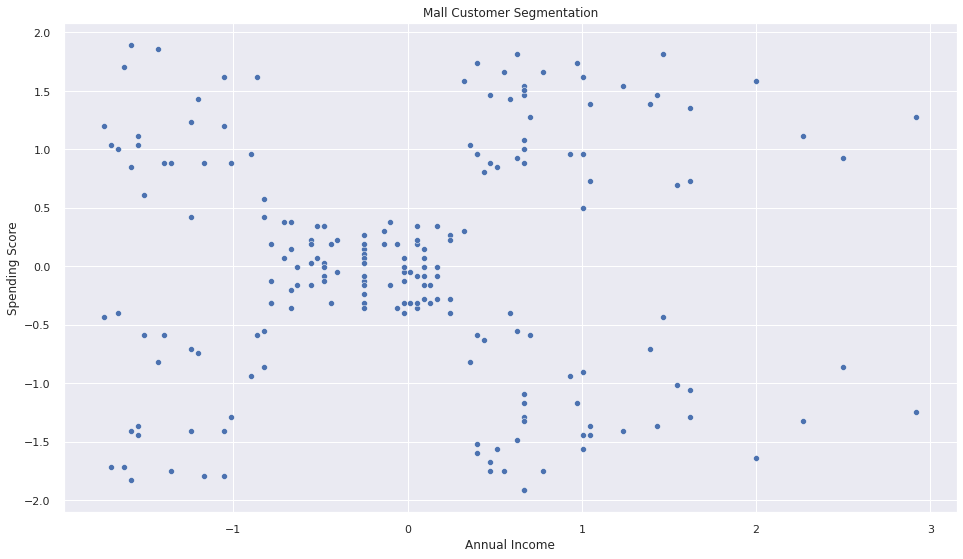

In [19]:
# Styling Plot
sns.set() 
plt.rcParams['figure.figsize'] = (16, 9)

# Visualizing the Data
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_mcsT)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title("Mall Customer Segmentation")
plt.show()


**Info**
As we can see  from data distribution map, data are grouped into 5 groups. But we will prove it again using elbow method and silhouette index

# **Determine Best Number of K**

## **Elbow Method**

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fde4e03e400>,
                 k=None, metric=None, model=None, timings=True)

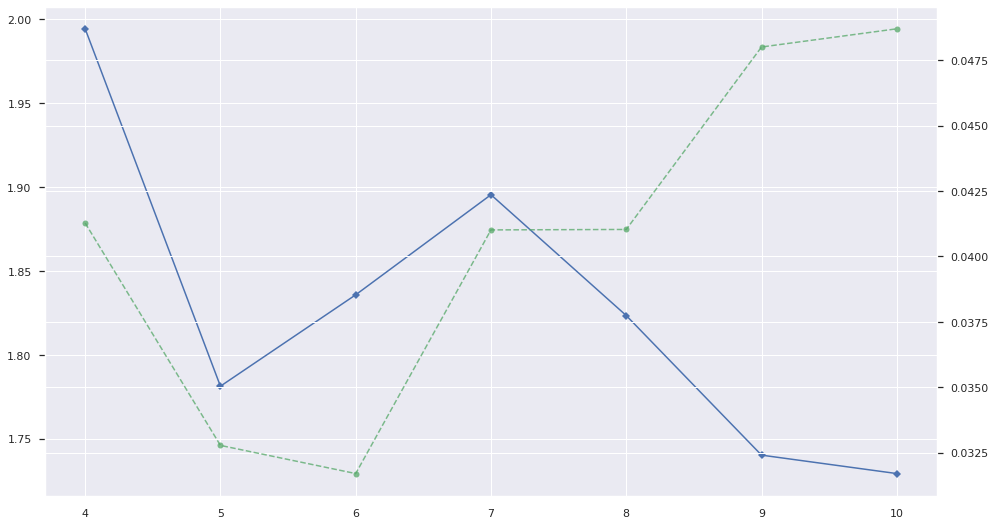

In [24]:
# Instantiate the clustering model and visualizer
df_model = KMeans()
visualizer = KElbowVisualizer(df_model, k=(4,11))

visualizer.fit(df_mcsT)        # Fit the data to the visualizer
# visualizer.show()        # Finalize and render the figure

## **Silhouette Index**

In [15]:
for n_cluster in range(3, 12):
    df_model2 = KMeans(n_clusters=n_cluster).fit(df_mcsT)
    label = df_model2.labels_
    sil_coeff = silhouette_score(df_mcsT, label, metric='euclidean')
    print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

For n_clusters=3, The Silhouette Coefficient is 0.46658474419000145
For n_clusters=4, The Silhouette Coefficient is 0.4939069237513199
For n_clusters=5, The Silhouette Coefficient is 0.5546571631111091
For n_clusters=6, The Silhouette Coefficient is 0.5398800926790663
For n_clusters=7, The Silhouette Coefficient is 0.5281492781108291
For n_clusters=8, The Silhouette Coefficient is 0.45549985447667657
For n_clusters=9, The Silhouette Coefficient is 0.4570853966942764
For n_clusters=10, The Silhouette Coefficient is 0.44942277625588267
For n_clusters=11, The Silhouette Coefficient is 0.449163994904316


# **Modelling KMeans**

**info**
Based on Elbow method and silhouettee, best K is 5 because it has bigest coefficient value than other and also best angels in elbow method visualization.

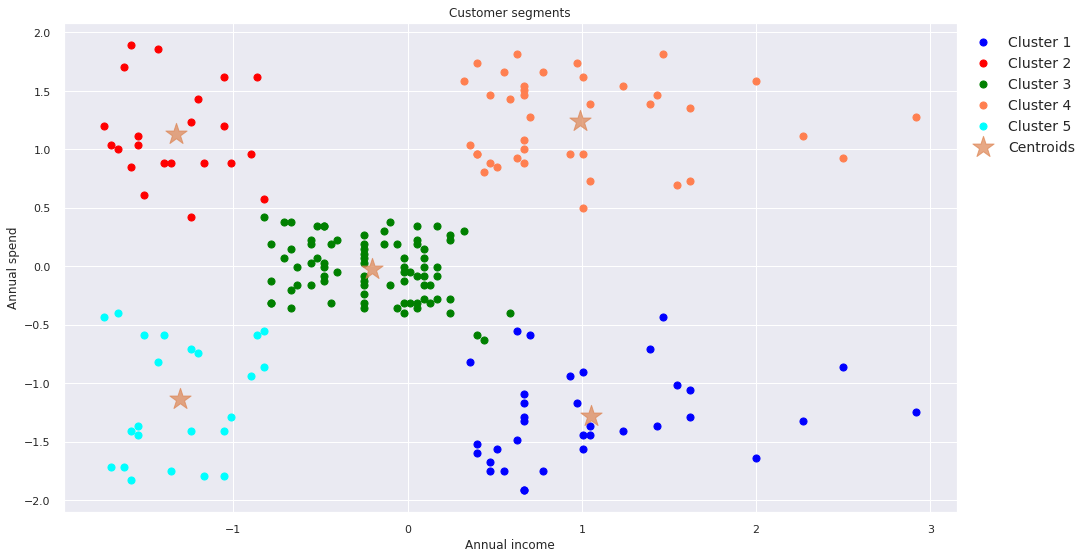

In [34]:
# Apply the K-Means Model to the Data
income = df_mcsT.to_numpy()
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster = kmeans.fit_predict(income)

# Visualising Clusters for k=3
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_mcsT)
plt.scatter(income[cluster == 0, 0], income[cluster == 0, 1], s = 50, label = 'Cluster 1', c='blue')
plt.scatter(income[cluster == 1, 0], income[cluster == 1, 1], s = 50, label = 'Cluster 2', c='red')
plt.scatter(income[cluster == 2, 0], income[cluster == 2, 1], s = 50, label = 'Cluster 3', c='green')
plt.scatter(income[cluster == 3, 0], income[cluster == 3, 1], s = 50, label = 'Cluster 4', c='coral')
plt.scatter(income[cluster == 4, 0], income[cluster == 4, 1], s = 50, label = 'Cluster 5', c='cyan')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=500,marker='*', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income')
plt.ylabel('Annual spend')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize=14)
plt.show()

In [36]:
# Include clustering result to dataframe
df_mcs['Cluster'] = cluster
df_mcs['Cluster'] = df_mcs['Cluster'].replace([0, 1, 2, 3, 4],['Very Thrifty', 'Very Wasteful', 'Fair', 'Wasteful', 'Thrifty'])
df_mcs.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,Thrifty
1,2,Male,21,15,81,Very Wasteful
2,3,Female,20,16,6,Thrifty
3,4,Female,23,16,77,Very Wasteful
4,5,Female,31,17,40,Thrifty


In [38]:
# save data to csv
df_mcs.to_csv('Customer Mall Clustering.csv', index=False)

# read test
df_result = pd.read_csv('Customer Mall Clustering.csv', sep=',')
df_result

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,Thrifty
1,2,Male,21,15,81,Very Wasteful
2,3,Female,20,16,6,Thrifty
3,4,Female,23,16,77,Very Wasteful
4,5,Female,31,17,40,Thrifty
...,...,...,...,...,...,...
195,196,Female,35,120,79,Wasteful
196,197,Female,45,126,28,Very Thrifty
197,198,Male,32,126,74,Wasteful
198,199,Male,32,137,18,Very Thrifty


# **Conclusion**

From clustring visualization above, we can conclude that there are 5 kind custumer, namely:


1.   Very Thrifty (Cluster 1). Customer group that has moderate to high income dan low spending score.
2.   Very Wasteful (Cluster 2). Customer group that has low income and high spending score.
3. fair (Cluster 3). Customer group that has moderate income and moderate spending score.
4. Wasteful (Cluster 4). Customer group that has moderate  to high income dan moderate to high spending score.
5. Thrifty (Cluster 5). Customer group that has low income and low spending score.

